### Question 3 Part a (6.10 Newman)
The question asks us to use the relaxation method on a function and then examine the accuracy and other parameters of the function. Particularly, how how the root of the function $ 1 - e^{-cx} $ changes with values of $c$.

In [10]:
import numpy as np
import matplotlib
import matplotlib.pylab as plt
matplotlib.rcParams['figure.figsize'] = (7, 7)
matplotlib.rcParams['font.size'] = 12

In [11]:
def Relax_Error(f_x,f_xprime, func_deriv,f_constant= 1.0):
    # Define the Relaxation Error using a function, it's derivative
    # and two floats of successive estimates of x
    return (f_x - f_xprime)/(1-(1/func_deriv(f_x,f_constant)))

In [12]:
def Offset_Exponential(f_x, f_constant = 1.0):
    # The equation given. I defined a default for the constant 
    #so the code is more modularized for use in later parts
    return 1 - np.exp(-1*f_constant*f_x)

In [13]:
def Exponential_Derivative(f_x, f_constant = 1.0):
    # The derivative of the above function
    return f_constant*np.exp(-1*f_constant*f_x)

In [14]:
def Root_Estimator(function, function_deriv, f_constant = 1.0,f_x =0.1):
    # This code estimates roots using relaxation method
    counter = 0   # counting steps
    f_error = 1   # meaningless default error
    f_errorlimit = 10**(-6)             # limit of error for order 10^-6
    # while loop for the error above the threshold OoM
    while np.abs(f_error) > f_errorlimit:   
        f_xnew = function(f_x,f_constant)   # calculates a new estimate
        f_error = Relax_Error(f_x,f_xnew,function_deriv,f_constant)
        # the above line calculates the error
        f_x = f_xnew  # redefines the initial guess
        counter += 1
    #print('The final answer is...',f_x)
    #print('COMPLETE')
    return f_x, counter

In [15]:
# Part A
# Testing that the functions work for c = 2
f_constant = 2.0
f_x,i_steps  = Root_Estimator(Offset_Exponential, Exponential_Derivative,f_constant)
print(f_x)

0.7968111529033527


In [18]:
a_constant = np.arange(0.01,3,0.01)     # define an array of different constants to sample
a_xval = np.empty(len(a_constant))   # empty array to be filled
a_steps = np.empty(len(a_constant))  # number of steps each run take
                                     # for loop to test each sample
for i in range(len(a_constant)): 
    #print(a_constant[i])
    a_xval[i], a_steps[i] = Root_Estimator(Offset_Exponential, Exponential_Derivative,a_constant[i])



Text(0.5,1,'Root of Nonlinear Function as a function of Constant')

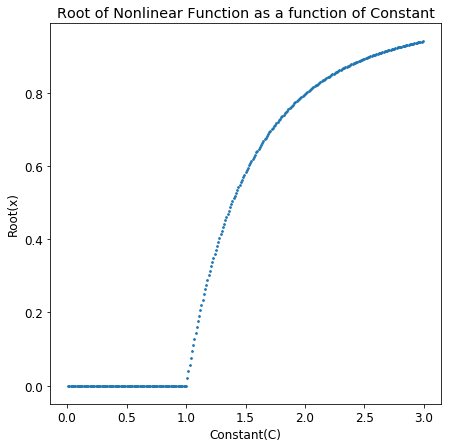

In [20]:
plt.figure()
plt.scatter(a_constant,a_xval, s = 3)
plt.xlabel('Constant(C)')
plt.ylabel('Root(x)')
plt.title('Root of Nonlinear Function as a function of Constant')


### Question 3 Part B
Now Question 6.11B just wanted to adapt 6.10 code to count the number of steps it took for c = 2. For 6.11C we will compare the number of steps for relaxation method versus overrelaxation

In [22]:
def Root_Overestimator(function, function_deriv,f_constant = 1):
    # same relaxation function except with overrelaxation
    f_x = 0.1  # initial guess
    f_w = 0.75 # overstepping parameter
    counter = 0  # initial counter
    f_error = 1  # initial meaningless error
    f_errorlimit = 10**(-6)             
    while np.abs(f_error) > f_errorlimit:
        f_xnew = (1+f_w)*function(f_x,f_constant)-f_w*f_x  # overrelaxation method 
        f_error = Relax_Error(f_x,f_xnew,function_deriv,f_constant)
        f_x = f_xnew
        counter += 1
    #print('The final answer is...',f_x)
    #print('COMPLETE')
    return f_x, counter

In [24]:
# 6.11, checking 6.10 with Overestimnator now
f_constant = 2.0
f_x,i_oversteps  = Root_Overestimator(Offset_Exponential, Exponential_Derivative,f_constant)
print(f_x)

0.7968121277836699


In [25]:
print('relaxation method step number...', i_steps )
print('overrelaxation method step number...', i_oversteps)

18 relaxation method step number
8 overrelaxation method step number


#### Question 6.11c
Here it is quite clear that the overstepping method takes less than half the number of iterated steps

##### Question 6.11D
Yes, Newman states that a $w > 0 $ changes $x$ by some amount larger than the original $\Delta x$. If the derivative was steep enough that you needed very small changes, then a negative $w$ would be useful.

## Question 6.13
The question wants us to solve another nonlinear equation, this time with the binary search function and the Newton Method. With this, we can estimate the surface temperature of the sun.
The function is 
\begin{equation}
5e^{-x}+x-5 = 0
\end{equation}

In [34]:
def Binary_Search(function):
    f_errorlimit = 10**(-6)   
    f_error = 1
    #
    f_x1 =  2
    f_x2 =  10
    counter = 0
    while np.abs(f_error) > f_errorlimit:
    #for i in range(10):
        f_val1 = function(f_x1)
        f_val2 = function(f_x2)
        #print(f_val1, f_val2)
        if np.sign(f_val1) != np.sign(f_val2):
            f_midpoint = (f_x1+f_x2)/2.0
            f_midval = function(f_midpoint)
            #print(f_midpoint)
        else:
            print('Something is very wrong #1')
        #print(f_x1, f_x2, f_midpoint)
        if np.sign(f_midval) != np.sign(f_val1):
            f_x2 = f_midpoint
        elif np.sign(f_midval) != np.sign(f_val2):
            f_x1 = f_midpoint
        else:
            print('Something is very wrong #2')
        f_error = np.abs(f_val1 - f_val2)
        counter += 1
    return (f_x1 + f_x2)/2.0 , counter
    

In [35]:
def Newton_Method(Wein_Displacement_Relax, Wein_Displacement_Deriv,f_guess):
    counter = 0
    f_error = 100
    f_errorlimit = 10**(-6)   
    while np.abs(f_error) > f_errorlimit:
        f_xnew = f_guess - Wein_Displacement(f_guess)/Wein_Displacement_Deriv(f_guess)
        f_error = f_xnew - f_guess
        f_guess = f_xnew
        counter += 1
    return(f_xnew, counter)
    

In [36]:
def Wein_Displacement(x):
    '''
    input of a float x 
    output of a float computed for Wein's Displacement Constant
    '''
    return  5*np.exp(-1*x) + x -5

In [37]:
def Wein_Displacement_Deriv(x):
    '''
    input and output of a float
    derivative of  Weins Displacement Constant nonlinear calculator
    '''
    return -5*np.exp(-1*x) + 1

In [38]:
def Wein_Displacement_Relax(x, f_constant = 1):
    '''
    input and output of a float
    Wein's Displacement Constant rewritten to solve for roots
    '''
    return 5 - 5*np.exp(-1*x)

In [39]:
def Wein_Displacement_Relax_Deriv(x, f_constant = 1):
    '''
    input and output of a float
    Wein's Displacement Constant derivative rewritten to solve for roots
    '''
    
    return 5*np.exp(-1*x)

In [40]:
def Wein_Constant(f_solution):
    f_planck   = 6.62607004*10**-34     # Planck's Constant
    f_boltzman = 1.38064852*10**-23     # Boltzman Constant
    f_light    = 299792458             #Speed of light
    f_factor = (f_planck/f_boltzman)*f_light
    # calculate the Wein's Displacement constant given certain natural constants
    return f_factor/f_solution

In [41]:
# Calculate Wein's Displacement Constant using Binary Search
f_exp_answer, i_binary_steps = Binary_Search(Wein_Displacement)
f_const_answer = Wein_Constant(f_exp_answer)
print(f_const_answer)
print(i_binary_steps)

0.002897772842539955
24


In [42]:
# Calculate Wein's Displacement Constant using Relaxation Method
f_exp_answer2, i_root_steps = Root_Estimator(Wein_Displacement_Relax, Wein_Displacement_Relax_Deriv,f_x =2 )
f_const_answer2 = Wein_Constant(f_exp_answer2)
print(f_const_answer2)
print(i_root_steps)

0.002897772942109512
6


In [43]:
# Calculate Wein's Displacement Constant using Newton's Method
f_exp_answer3, i_newt_steps = Newton_Method(Wein_Displacement_Relax, Wein_Displacement_Deriv, 2)
f_const_answer3 = Wein_Constant(f_exp_answer3)
print(f_const_answer3)
print(i_newt_steps)

0.002897772914526216
5


### Question 6.13C 
The question wants us to calculate the surface temperature of the sun. I can rewrite the Wein Displacement law as 
\begin{equation}
T = \frac{b}{\lambda}
\end{equation} 
and then just plug in the wavelength $\lambda = 502\text{ nm}$ and the value of the displacement constant from above. 

In [44]:
f_surface_temp = f_const_answer/(502*10**-9)
print('the surface temperature(K) of the Sun is...',f_surface_temp)

the surface temperature(K) of the Sun is... 5772.455861633377


### Note on the Accuracy of Surface Temperature
Wikipedia defines the surface temperature of the sun as approx. $5778$K. This means are errors are of the order $10^{-3}$
